<a href="https://colab.research.google.com/github/Sandeepkumar607/Safety_Model/blob/main/Safety_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install diffusers transformers accelerate --upgrade
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install xformers

Looking in indexes: https://download.pytorch.org/whl/cu118


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Image saved as Tata_Steel_0.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

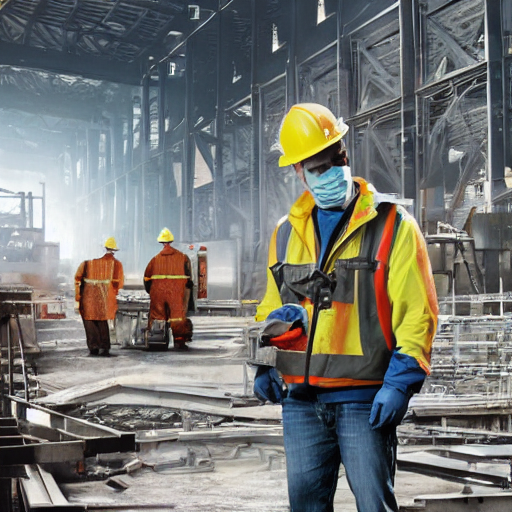

  0%|          | 0/50 [00:00<?, ?it/s]

Image saved as Tata_Steel_0.png


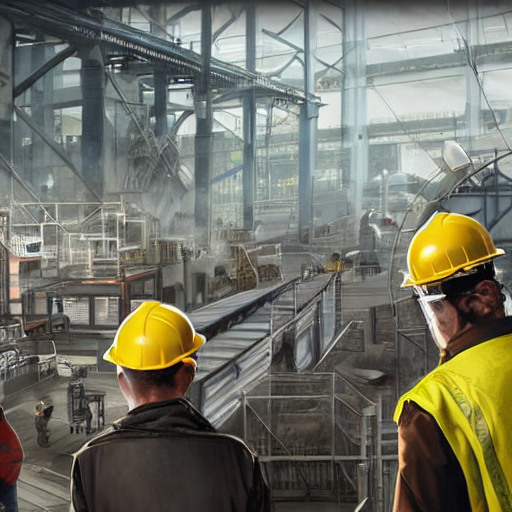

In [ ]:
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image

model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16
)
pipe = pipe.to("cuda")

pipe.enable_xformers_memory_efficient_attention()

prompt = (
    "A bustling steel company scene showing workers ignoring safety protocols. "
    "The background features heavy machinery and large steel structures. "
    "In the foreground, a worker in full PPE is distractedly talking on a smartphone, "
    "while another worker is casually leaning on a safety barricade in a high-risk area. "
    "The atmosphere is realistic, highlighting the industrial setting and safety violations."
)

try:
    with torch.autocast("cuda"):
        images = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images

    for i, img in enumerate(images):
        img.show()
        filename = f"Safety_{i}.png"
        img.save(filename)
        print(f"Image saved as {filename}")

    from google.colab import files
    for i in range(len(images)):
        files.download(f"Safety_{i}.png")

except Exception as e:
    print(f"An error occurred during image generation: {e}")

def display_images(images):
    from IPython.display import display
    for img in images:
        display(img)

display_images(images)



Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (145 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["metallic tones of the plant. reflections from the overhead lights can be seen in the oil, adding to the realism of the spill. in the foreground, a caution sign is placed near the spill, but it's partially obscured by the spreading oil. the atmosphere is gritty and industrial, emphasizing the urgency and potential danger of the situation."]


  0%|          | 0/50 [00:00<?, ?it/s]

Image saved as Tata_Steel_0.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

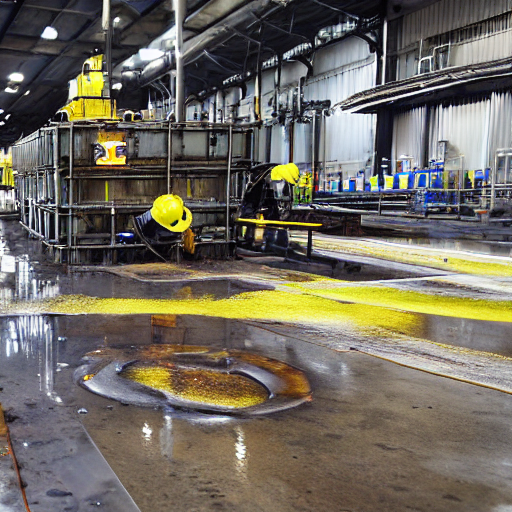

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["metallic tones of the plant. reflections from the overhead lights can be seen in the oil, adding to the realism of the spill. in the foreground, a caution sign is placed near the spill, but it's partially obscured by the spreading oil. the atmosphere is gritty and industrial, emphasizing the urgency and potential danger of the situation."]


  0%|          | 0/50 [00:00<?, ?it/s]

Image saved as Tata_Steel_0.png


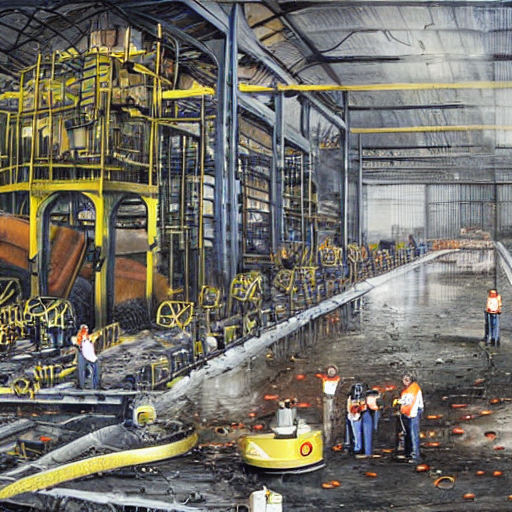

In [ ]:
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image

from huggingface_hub import login

model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16
)

pipe = pipe.to("cuda")

pipe.enable_xformers_memory_efficient_attention()

prompt = (
    "A detailed scene of a lubrication oil spill in a bustling steel plant environment. The spill covers a large area on the factory floor, creating a shiny, slippery surface. Workers in the background are wearing safety gear and operating heavy machinery, unaware of the hazard. Large steel structures and industrial equipment surround the scene. The oil's dark color contrasts with the gray and metallic tones of the plant. Reflections from the overhead lights can be seen in the oil, adding to the realism of the spill. In the foreground, a caution sign is placed near the spill, but it's partially obscured by the spreading oil. The atmosphere is gritty and industrial, emphasizing the urgency and potential danger of the situation."
)

try:
    with torch.autocast("cuda"):
        images = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images

    for i, img in enumerate(images):
        img.show()
        filename = f"Tata_Steel_{i}.png"
        img.save(filename)
        print(f"Image saved as {filename}")

except Exception as e:
    print(f"An error occurred during image generation: {e}")

from google.colab import files
files.download("Tata_Steel_0.png")

def display_images(images):
    from IPython.display import display
    for img in images:
        display(img)

display_images(images)

try:
    with autocast("cuda"):
        images = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images

    for i, img in enumerate(images):
        img.show()
        filename = f"Tata_Steel_{i}.png"
        img.save(filename)
        print(f"Image saved as {filename}")

except Exception as e:
    print(f"An error occurred during image generation: {e}")

def display_images(images):
    from IPython.display import display
    for img in images:
        display(img)

display_images(images)